In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/alzheimers_disease_data.csv')

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [ ]:
df.shape

(2149, 35)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.drop(columns="DoctorInCharge",axis=1,inplace=True)
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [ ]:
pip install imbalanced-learn

In [ ]:
X = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_logreg))
print('Accuracy:',accuracy_score(y_test,y_pred_logreg))
print('Precision:',precision_score(y_test,y_pred_logreg))
print('Recall:',recall_score(y_test,y_pred_logreg))
print('F1 score:',f1_score(y_test,y_pred_logreg))

[[453  92]
 [137 178]]
Accuracy: 0.7337209302325581
Precision: 0.6592592592592592
Recall: 0.5650793650793651
F1 score: 0.6085470085470085


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
Accuracy: 0.7255813953488373


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
y_pred_dt=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy:',accuracy_score(y_test,y_pred_dt))
print('Precision:',precision_score(y_test,y_pred_dt))
print('Recall:',recall_score(y_test,y_pred_dt))
print('F1 score:',f1_score(y_test,y_pred_dt))

[[528  17]
 [ 33 282]]
Accuracy: 0.9418604651162791
Precision: 0.9431438127090301
Recall: 0.8952380952380953
F1 score: 0.9185667752442996


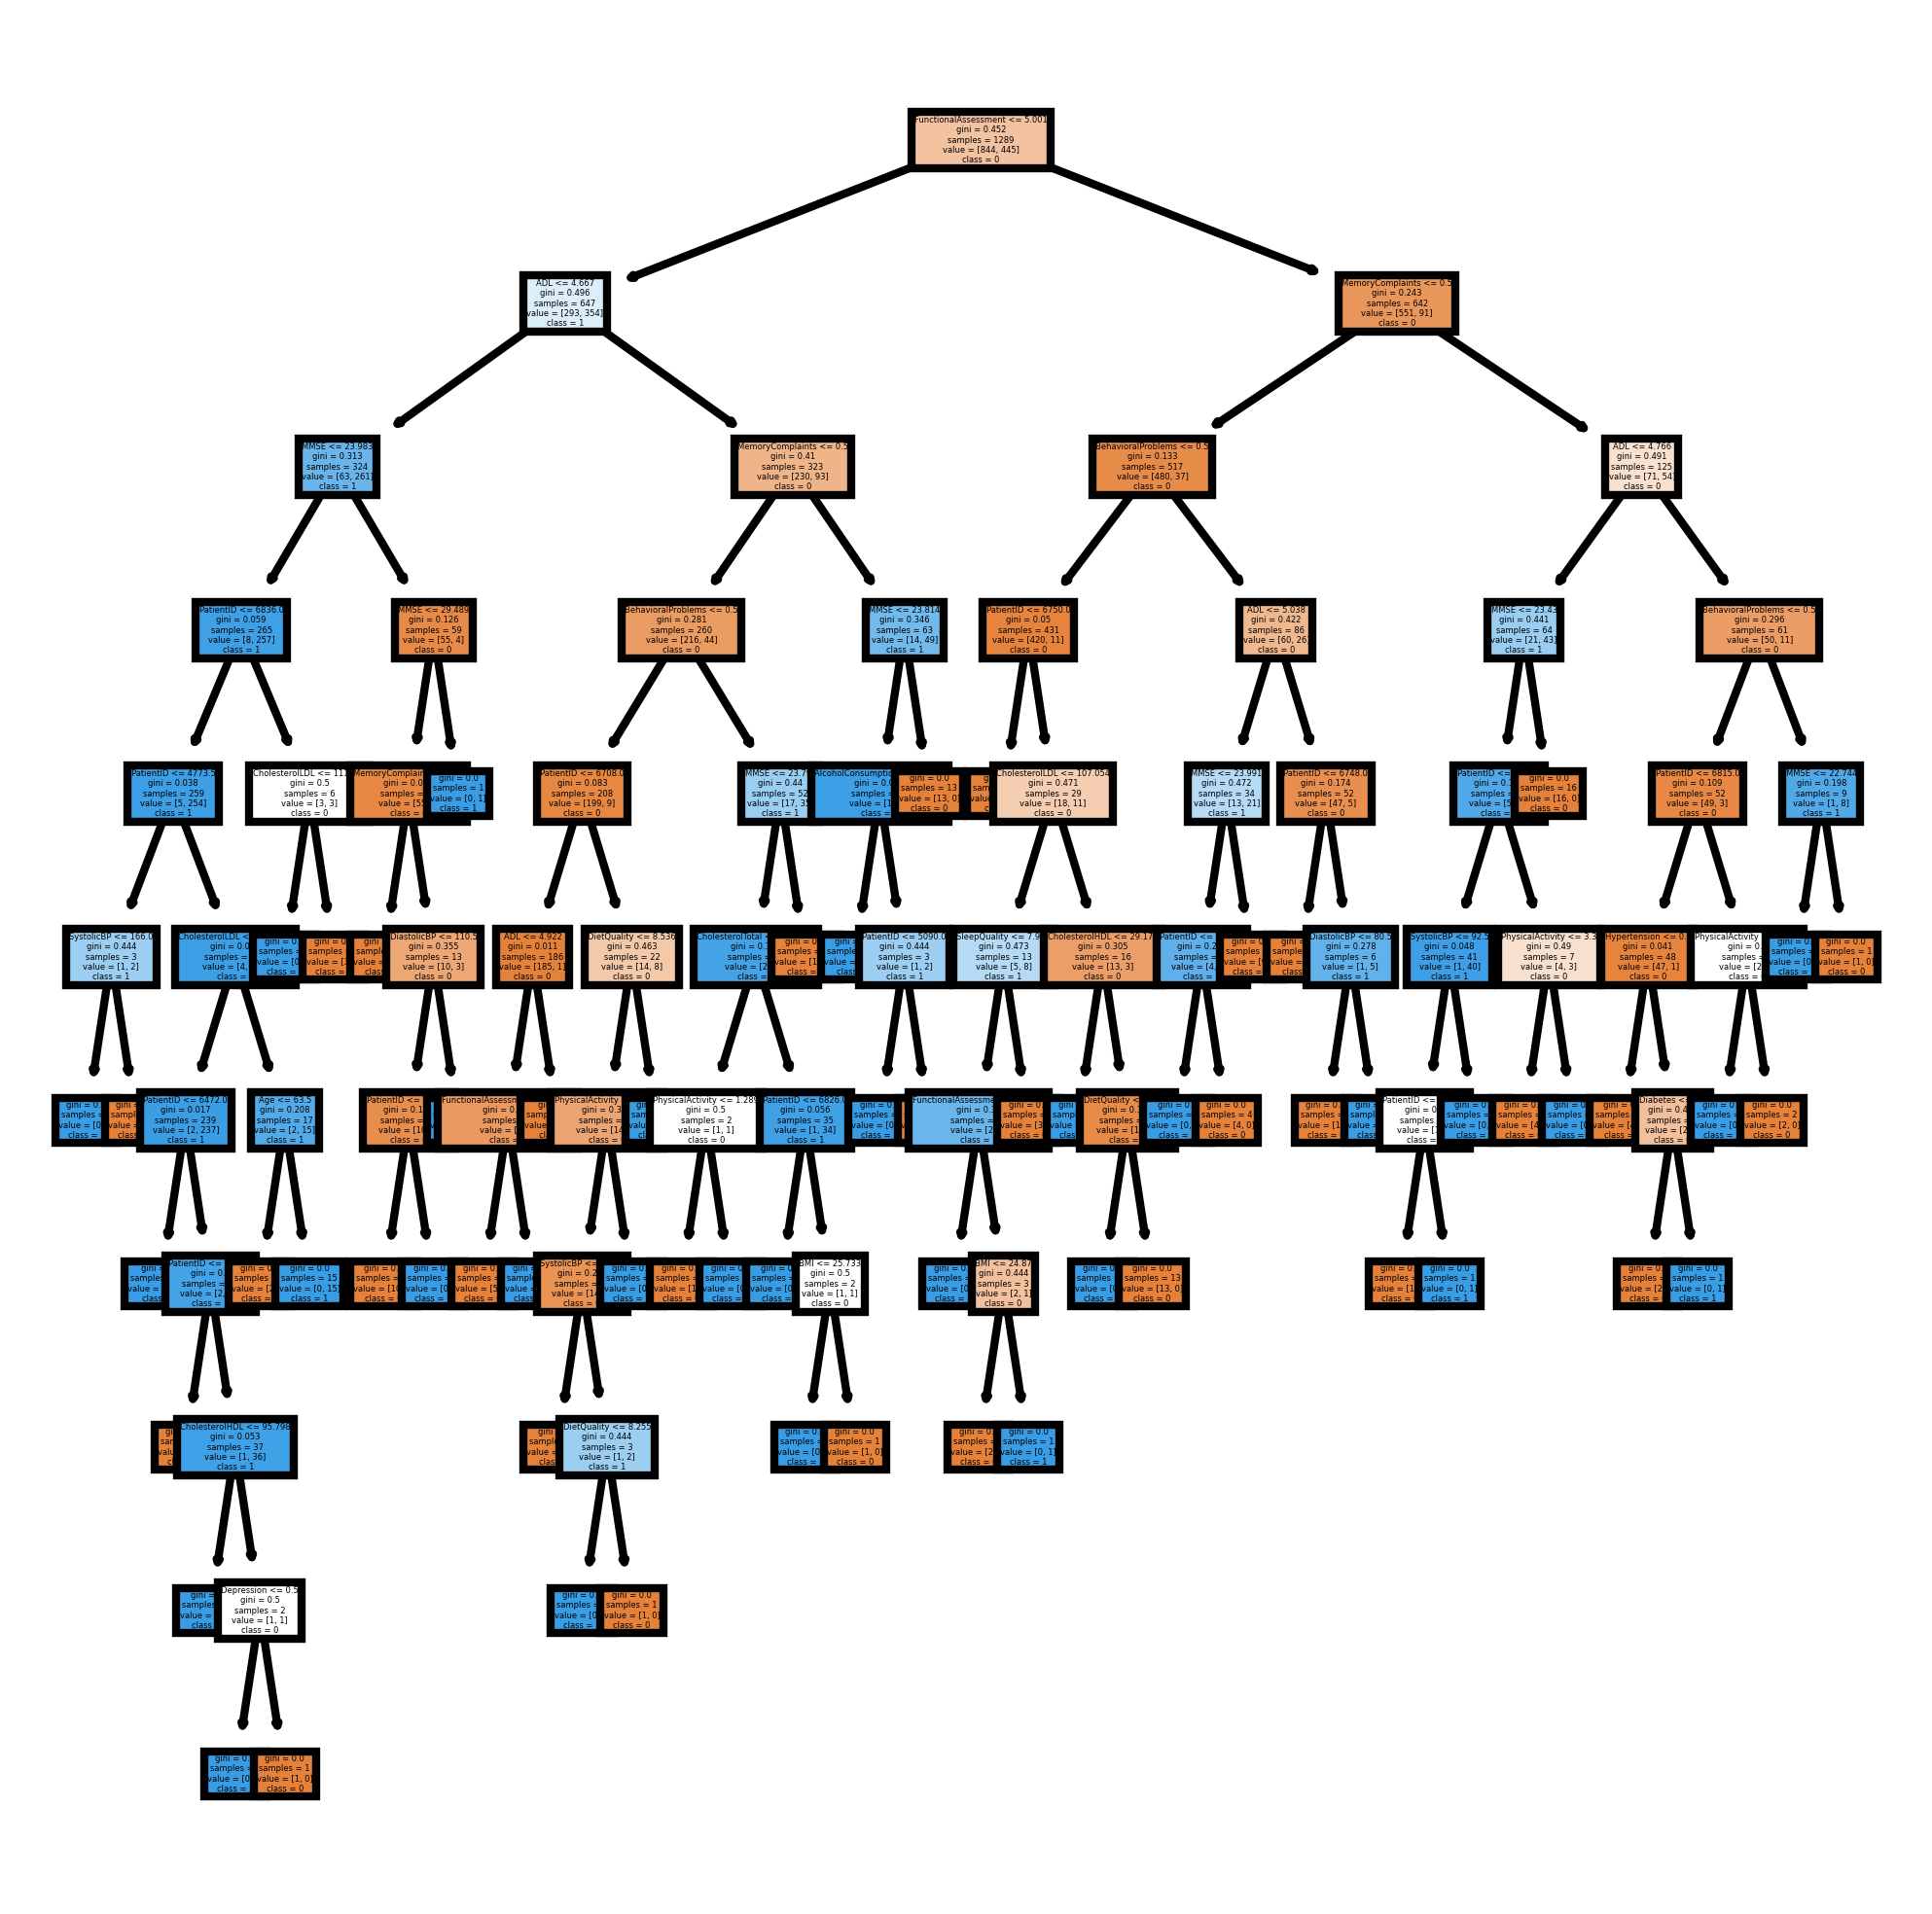

In [ ]:
from sklearn.tree import plot_tree
fn=list(X_train)
cn=['0','1']
plt.figure(figsize=(4,4),dpi=600)
plot_tree(dtree,feature_names=fn,class_names=cn,filled=True);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)
y_pred_dt=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy:',accuracy_score(y_test,y_pred_dt))
print('Precision:',precision_score(y_test,y_pred_dt))
print('Recall:',recall_score(y_test,y_pred_dt))
print('F1 score:',f1_score(y_test,y_pred_dt))

[[526  19]
 [ 28 287]]
Accuracy: 0.9453488372093023
Precision: 0.9379084967320261
Recall: 0.9111111111111111
F1 score: 0.9243156199677939


SVM

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.1)
clf.fit(X_train,y_train)
y_pred_svm=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))


[[485  60]
 [112 203]]
0.8
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       545
           1       0.77      0.64      0.70       315

    accuracy                           0.80       860
   macro avg       0.79      0.77      0.78       860
weighted avg       0.80      0.80      0.80       860



Random Forest-ensemble model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train,y_train)
y_pred_rf=rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


[[530  15]
 [ 93 222]]
0.8744186046511628
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       545
           1       0.94      0.70      0.80       315

    accuracy                           0.87       860
   macro avg       0.89      0.84      0.86       860
weighted avg       0.88      0.87      0.87       860



Boosting -Gradient boost,XG Boost,Cat Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster=GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_pred_gradboost=gradient_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_gradboost))
print(accuracy_score(y_test,y_pred_gradboost))
print(classification_report(y_test,y_pred_gradboost))


[[527  18]
 [ 28 287]]
0.9465116279069767
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       545
           1       0.94      0.91      0.93       315

    accuracy                           0.95       860
   macro avg       0.95      0.94      0.94       860
weighted avg       0.95      0.95      0.95       860



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred_abc=abc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))



[[512  33]
 [ 59 256]]
0.8930232558139535
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       545
           1       0.89      0.81      0.85       315

    accuracy                           0.89       860
   macro avg       0.89      0.88      0.88       860
weighted avg       0.89      0.89      0.89       860



In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=1)
model.fit(X_train,y_train)
y_pred_xgb=model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))


[[527  18]
 [ 33 282]]
0.9406976744186046
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       545
           1       0.94      0.90      0.92       315

    accuracy                           0.94       860
   macro avg       0.94      0.93      0.94       860
weighted avg       0.94      0.94      0.94       860



In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model1= CatBoostClassifier(learning_rate=1)
model1.fit(X_train,y_train)
y_pred_cat=model1.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))



0:	learn: 0.2055219	total: 67.7ms	remaining: 1m 7s
1:	learn: 0.1514472	total: 97.6ms	remaining: 48.7s
2:	learn: 0.1154809	total: 113ms	remaining: 37.7s
3:	learn: 0.0886510	total: 126ms	remaining: 31.3s
4:	learn: 0.0750318	total: 138ms	remaining: 27.5s
5:	learn: 0.0666017	total: 150ms	remaining: 24.9s
6:	learn: 0.0505102	total: 162ms	remaining: 22.9s
7:	learn: 0.0429604	total: 173ms	remaining: 21.5s
8:	learn: 0.0385540	total: 191ms	remaining: 21s
9:	learn: 0.0351878	total: 202ms	remaining: 20s
10:	learn: 0.0322862	total: 224ms	remaining: 20.1s
11:	learn: 0.0279266	total: 234ms	remaining: 19.3s
12:	learn: 0.0254426	total: 245ms	remaining: 18.6s
13:	learn: 0.0224769	total: 256ms	remaining: 18s
14:	learn: 0.0175630	total: 261ms	remaining: 17.2s
15:	learn: 0.0158908	total: 267ms	remaining: 16.4s
16:	learn: 0.0144300	total: 272ms	remaining: 15.7s
17:	learn: 0.0130648	total: 277ms	remaining: 15.1s
18:	learn: 0.0125084	total: 282ms	remaining: 14.6s
19:	learn: 0.0112772	total: 288ms	remaining: 

Ensemble model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_knn,y_pred_svm,y_pred_dt]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_prediction=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_prediction))
print(accuracy_score(y_test,ensemble_prediction))
print(classification_report(y_test,ensemble_prediction))


[[526  19]
 [ 28 287]]
0.9453488372093023
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       545
           1       0.94      0.91      0.92       315

    accuracy                           0.95       860
   macro avg       0.94      0.94      0.94       860
weighted avg       0.95      0.95      0.95       860



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_rf,y_pred_xgb,y_pred_abc,y_pred_cat,y_pred_gradboost]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_prediction=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_prediction))
print(accuracy_score(y_test,ensemble_prediction))
print(classification_report(y_test,ensemble_prediction))


[[525  20]
 [ 15 300]]
0.9593023255813954
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       545
           1       0.94      0.95      0.94       315

    accuracy                           0.96       860
   macro avg       0.95      0.96      0.96       860
weighted avg       0.96      0.96      0.96       860



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_svm,y_pred_xgb,y_pred_abc,y_pred_cat]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_prediction=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_prediction))
print(accuracy_score(y_test,ensemble_prediction))
print(classification_report(y_test,ensemble_prediction))


[[526  19]
 [ 17 298]]
0.958139534883721
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       545
           1       0.94      0.95      0.94       315

    accuracy                           0.96       860
   macro avg       0.95      0.96      0.95       860
weighted avg       0.96      0.96      0.96       860

